In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import savemat, loadmat
import scipy.interpolate as interp

In [99]:
def fuzzyPID1(etr):

## e memberships
    try:
        c1 = -0.5; c2 = -0.2; c3 = -0.01; c4 = 0; c5 = 0.01; c6 = 0.2; c7 = 0.5;
        e = etr[0]

        if c1<= e and e<= c2:
            S2e = 1
        elif c2<=e and e<c3:
            S2e = 1-((e-c2)/(c3-c2));
        elif c3<=e and e<=c7:
            S2e = 0


        if c2<=e and e<=c3:
            S1e= 1-((c3-e)/(c3-c2))
        elif c3<=e and e<=c4:
            S1e= 1-((e-c3)/(c4-c3))
        elif c4<=e and e<=c7:
            S1e=0
        elif c1<=e and e<=c2:
            S1e=0


        if c3<=e and e<=c4:
            CEe= 1-((c4-e)/(c4-c3))
        elif c4<=e and e<=c5:
            CEe= 1-((e-c4)/(c5-c4))
        elif c5<=e and e<=c7:
            CEe=0
        elif c1<=e and e<=c3:
            CEe=0


        if c4<=e and e<=c5:
            B1e= 1-((c5-e)/(c5-c4))
        elif c5<=e and e<=c6:
            B1e= 1-((e-c5)/(c6-c5))
        elif c6<=e and e<=c7:
            B1e=0
        elif c1<=e and e<=c4:
            B1e=0


        if c5<=e and e<=c6:
            B2e= 1-((c6-e)/(c6-c5))
        elif c6<=e and e<=c7:
            B2e=1
        elif c1<=e and e<=c5:
            B2e=0


    except:
        # Hata durumunda mesajı 
        print("hata fuzzy 1 de olustu")


        ## edot memberships
    try:
        c1 = -30; c2 = -0.05; c3 = -0.01; c4 = 0; c5 = 0.01; c6 = 0.05; c7 = 30;
        edot = etr[0]

        if c1<= edot and edot<= c2:
            S2v = 1
        elif c2<=edot and edot<c3:
            S2v = 1-((edot-c2)/(c3-c2))
        elif c3<=edot and edot<=c7:
            S2v = 0


        if c2<=edot and edot<=c3:
            S1v= 1-((c3-edot)/(c3-c2))
        elif c3<=edot and edot<=c4:
            S1v= 1-((edot-c3)/(c4-c3))
        elif c4<=edot and edot<=c7:
            S1v=0
        elif c1<=edot and edot<=c2:
            S1v=0


        if c3<=edot and edot<=c4:
            CEv= 1-((c4-edot)/(c4-c3))
        elif c4<=edot and edot<=c5:
            CEv= 1-((edot-c4)/(c5-c4))
        elif c5<=edot and edot<=c7:
            CEv=0
        elif c1<=edot and edot<=c3:
            CEv=0


        if c4<=edot and edot<=c5:
            B1v= 1-((c5-edot)/(c5-c4))
        elif c5<=edot and edot<=c6:
            B1v= 1-((edot-c5)/(c6-c5))
        elif c6<=edot and edot<=c7:
            B1v=0
        elif c1<=edot and edot<=c4:
            B1v=0


        if c5<=edot and edot<=c6:
            B2v= 1-((c6-edot)/(c6-c5))
        elif c6<=edot and edot<=c7:
            B2v=1
        elif c1<=edot and edot<=c5:
            B2v=0

    except:
        # Hata durumunda mesajı 
        print("hata fuzzy2 de olustu")


    ## KP membership
    try:
        k = 0
        Ts = 0.01
        aa_values=np.arange(0,1+Ts,Ts)
        Sp= np.zeros_like(aa_values)
        Bp= np.zeros_like(aa_values)
        for aa in aa_values:
            if 0<= aa and aa<=1:
                Sp[k]= (1-aa)/1
                Bp[k]= aa/1
            else:
                Sp[k]= 0
                Bp[k]= 0
            k+=1

    except:
        print("fuzzy 3 de hata olustu")

## KD üyelik

    try:
        k = 0 
        Ts = 0.01
        aa_values=np.arange(0,1+Ts,Ts)
        Sd= np.zeros_like(aa_values)
        Bd= np.zeros_like(aa_values)
        for aa in aa_values: 
            if 0<= aa and aa<=1:
                Sd[k] = (1-aa)/1
                Bd[k] = aa/1
            else:
                Sd[k] = 0
                Bd[k] = 0
            k+=1  
    except:
        print("fuzzy 4 te hata olustu")


## Ki Uyelik

    try:
        c1 = 0; c2 = 0.3; c3 = 0.4; c4 = 0.5; c5 = 0.6; c6 = 0.7; c7 = 1
        k = 0 
        Ts = 0.01
        aa_values=np.arange(0,1+Ts,Ts)
        S2i= np.zeros_like(aa_values)
        S1i= np.zeros_like(aa_values)
        CEi= np.zeros_like(aa_values)
        B1i= np.zeros_like(aa_values)
        B2i= np.zeros_like(aa_values)
        for aa in aa_values: 

            if c1<= aa and aa<= c2:
                S2i[k] = 1
            elif c2<=aa and aa<c3:
                S2i[k] = 1-((aa-c2)/(c3-c2))
            elif c3<=aa and aa<=c7:
                S2i[k] = 0


            if c2<=aa and aa<=c3:
                S1i[k]= 1-((c3-aa)/(c3-c2))
            elif c3<=aa and aa<=c4:
                S1i[k]= 1-((aa-c3)/(c4-c3))
            elif c4<=aa and aa<=c7:
                S1i[k]=0
            elif c1<=aa and aa<=c2:
                S1i[k]=0


            if c3<=aa and aa<=c4:
                CEi[k]= 1-((c4-aa)/(c4-c3))
            elif c4<=aa and aa<=c5:
                CEi[k]= 1-((aa-c4)/(c5-c4))
            elif c5<=aa and aa<=c7:
                CEi[k]=0
            elif c1<=aa and aa<=c3:
                CEi[k]=0


            if c4<=aa and aa<=c5:
                B1i[k]= 1-((c5-aa)/(c5-c4))
            elif c5<=aa and aa<=c6:
                B1i[k]= 1-((aa-c5)/(c6-c5))
            elif c6<=aa and aa<=c7:
                B1i[k]=0
            elif c1<=aa and aa<=c4:
                B1i[k]=0


            if c5<=aa and aa<=c6:
                B2i[k]= 1-((c6-aa)/(c6-c5))
            elif c6<=aa and aa<=c7:
                B2i[k]=1
            elif c1<=aa and aa<=c5:
                B2i[k]=0


            k+=1
    except:
        print("fuzzy 5 te hata olustu")

## KP hesaplama
    
    tp = np.linspace(0, 1, len(Sp))
    pro_rules = []
    try:
        for i in range(len(Sp)):
            pro_rule1 = S2e * S2v * Bp[i]
            pro_rule2 = S2e * S1v * Bp[i]
            pro_rule3 = S2e * CEv * Bp[i]
            pro_rule4 = S2e * B1v * Bp[i]
            pro_rule5 = S2e * B2v * Bp[i]
            pro_rule6 = S1e * S2v * Sp[i]
            pro_rule7 = S1e * S1v * Bp[i]
            pro_rule8 = S1e * CEv * Bp[i]
            pro_rule9 = S1e * B1v * Bp[i]
            pro_rule10 = S1e * B2v * Sp[i]
            pro_rule11 = CEe * S2v * Sp[i]
            pro_rule12 = CEe * S1v * Sp[i]
            pro_rule13 = CEe * CEv * Bp[i]
            pro_rule14 = CEe * B1v * Sp[i]
            pro_rule15 = CEe * B2v * Sp[i]
            pro_rule16 = B1e * S2v * Sp[i]
            pro_rule17 = B1e * S1v * Bp[i]
            pro_rule18 = B1e * CEv * Bp[i]
            pro_rule19 = B1e * B1v * Bp[i]
            pro_rule20 = B1e * B2v * Sp[i]
            pro_rule21 = B2e * S2v * Bp[i]
            pro_rule22 = B2e * S1v * Bp[i]
            pro_rule23 = B2e * CEv * Bp[i]
            pro_rule24 = B2e * B1v * Bp[i]
            pro_rule25 = B2e * B2v * Bp[i]
    

            pro_rules.append([pro_rule1, pro_rule2, pro_rule3, pro_rule4, pro_rule5,
                              pro_rule6, pro_rule7, pro_rule8, pro_rule9, pro_rule10,
                              pro_rule11, pro_rule12, pro_rule13, pro_rule14, pro_rule15,
                              pro_rule16, pro_rule17, pro_rule18, pro_rule19, pro_rule20,
                              pro_rule21, pro_rule22, pro_rule23, pro_rule24, pro_rule25])
    except:
        print("kp satırında hata olustu")
        
    pro_rules = np.array(pro_rules)

    Kp_out_mf = np.max(pro_rules, axis=1)
    tp = np.linspace(0, 1, Kp_out_mf.shape[0])
    Kp = np.sum(Kp_out_mf * tp) / np.sum(Kp_out_mf)

   
    
## Kd hesaplama
    
    td = np.linspace(0, 1, len(Sp))
    pro_rules = []
    try:
        for i in range(len(Sd)):
            pro_rule1  =  S2e*S2v*Bd[i];
            pro_rule2  =  S2e*S1v*Bd[i];
            pro_rule3  =  S2e*CEv*Bd[i];
            pro_rule4  =  S2e*B1v*Bd[i];
            pro_rule5  =  S2e*B2v*Bd[i];

            pro_rule6  =  S1e*S2v*Sd[i];
            pro_rule7  =  S1e*S1v*Bd[i];
            pro_rule8  =  S1e*CEv*Bd[i];
            pro_rule9  =  S1e*B1v*Bd[i];
            pro_rule10  =  S1e*B2v*Sd[i];

            pro_rule11  =  CEe*S2v*Sd[i];
            pro_rule12  =  CEe*S1v*Sd[i];
            pro_rule13  =  CEe*CEv*Bd[i];
            pro_rule14  =  CEe*B1v*Sd[i];
            pro_rule15  =  CEe*B2v*Sd[i];

            pro_rule16  =  B1e*S2v*Sd[i];
            pro_rule17  =  B1e*S1v*Bd[i];
            pro_rule18  =  B1e*CEv*Bd[i];
            pro_rule19  =  B1e*B1v*Bd[i];
            pro_rule20  =  B1e*B2v*Sd[i];

            pro_rule21  =  B2e*S2v*Bd[i];
            pro_rule22  =  B2e*S1v*Bd[i];
            pro_rule23  =  B2e*CEv*Bd[i];
            pro_rule24  =  B2e*B1v*Bd[i];
            pro_rule25  =  B2e*B2v*Bd[i];

    
            pro_rules.append([pro_rule1, pro_rule2, pro_rule3, pro_rule4, pro_rule5,
                              pro_rule6, pro_rule7, pro_rule8, pro_rule9, pro_rule10,
                              pro_rule11, pro_rule12, pro_rule13, pro_rule14, pro_rule15,
                              pro_rule16, pro_rule17, pro_rule18, pro_rule19, pro_rule20,
                              pro_rule21, pro_rule22, pro_rule23, pro_rule24, pro_rule25])
    except:
        print("kd hesapalamada hata var")
        
    pro_rules = np.array(pro_rules)
    Kd_out_mf  =  np.max(pro_rules,axis=1); 
    #Kd  =  defuzz_coa(Kd_out_mf);
    td = np.linspace(0,1,Kd_out_mf.shape[0]);
    Kd = np.sum(Kd_out_mf*td)/np.sum(Kd_out_mf);
    
    ## Ki hesaplama
    td = np.linspace(0, 1, len(Sp))
    pro_rules = []
    try:
        for i in range(len(S2i)):
            pro_rule1  =  S2e*S2v*CEi[i];
            pro_rule2  =  S2e*S1v*S1i[i];
            pro_rule3  =  S2e*CEv*S1i[i];
            pro_rule4  =  S2e*B1v*S1i[i];
            pro_rule5  =  S2e*B2v*CEi[i];

            pro_rule6  =  S1e*S2v*CEi[i];
            pro_rule7  =  S1e*S1v*CEi[i];
            pro_rule8  =  S1e*CEv*S1i[i];
            pro_rule9  =  S1e*B1v*CEi[i];
            pro_rule10  =  S1e*B2v*CEi[i];

            pro_rule11  =  CEe*S2v*B1i[i];
            pro_rule12  =  CEe*S1v*CEi[i];
            pro_rule13  =  CEe*CEv*CEi[i];
            pro_rule14  =  CEe*B1v*CEi[i];
            pro_rule15  =  CEe*B2v*B1i[i];

            pro_rule16  =  B1e*S2v*CEi[i];
            pro_rule17  =  B1e*S1v*CEi[i];
            pro_rule18  =  B1e*CEv*S1i[i];
            pro_rule19  =  B1e*B1v*CEi[i];
            pro_rule20  =  B1e*B2v*CEi[i];

            pro_rule21  =  B2e*S2v*CEi[i];
            pro_rule22  =  B2e*S1v*S1i[i];
            pro_rule23  =  B2e*CEv*S1i[i];
            pro_rule24  =  B2e*B1v*S1i[i];
            pro_rule25  =  B2e*B2v*CEi[i];

            pro_rules.append([pro_rule1, pro_rule2, pro_rule3, pro_rule4, pro_rule5,
                              pro_rule6, pro_rule7, pro_rule8, pro_rule9, pro_rule10,
                              pro_rule11, pro_rule12, pro_rule13, pro_rule14, pro_rule15,
                              pro_rule16, pro_rule17, pro_rule18, pro_rule19, pro_rule20,
                              pro_rule21, pro_rule22, pro_rule23, pro_rule24, pro_rule25])
    except:
        print("ki hesaplamada sorun var")
    pro_rules = np.array(pro_rules)
    Ki_out_mf  =  np.max(pro_rules,axis=1); 
    #Ki  =  defuzz_coa(Ki_out_mf);
    ti = np.linspace(0,1,Ki_out_mf.shape[0]);
    Ki = np.sum(Ki_out_mf*ti)/np.sum(Ki_out_mf);
    #print("kp:",Kp,"kd:",Kd,"ki:",Ki)
    return Kp,Ki,Kd
    


In [100]:
def fuzzyPID2(etr):

## e memberships
    try:
        c1 = -.5; c2 = -0.01; c3 = -0.001; c4 = 0; c5 = 0.001; c6 = 0.01; c7 = .5;
        e = etr[0]

        if c1<= e and e<= c2:
            S2e = 1
        elif c2<=e and e<c3:
            S2e = 1-((e-c2)/(c3-c2));
        elif c3<=e and e<=c7:
            S2e = 0


        if c2<=e and e<=c3:
            S1e= 1-((c3-e)/(c3-c2))
        elif c3<=e and e<=c4:
            S1e= 1-((e-c3)/(c4-c3))
        elif c4<=e and e<=c7:
            S1e=0
        elif c1<=e and e<=c2:
            S1e=0


        if c3<=e and e<=c4:
            CEe= 1-((c4-e)/(c4-c3))
        elif c4<=e and e<=c5:
            CEe= 1-((e-c4)/(c5-c4))
        elif c5<=e and e<=c7:
            CEe=0
        elif c1<=e and e<=c3:
            CEe=0


        if c4<=e and e<=c5:
            B1e= 1-((c5-e)/(c5-c4))
        elif c5<=e and e<=c6:
            B1e= 1-((e-c5)/(c6-c5))
        elif c6<=e and e<=c7:
            B1e=0
        elif c1<=e and e<=c4:
            B1e=0


        if c5<=e and e<=c6:
            B2e= 1-((c6-e)/(c6-c5))
        elif c6<=e and e<=c7:
            B2e=1
        elif c1<=e and e<=c5:
            B2e=0


    except:
        # Hata durumunda mesajı 
        print("hata fuzzy 1 de olustu")


        ## edot memberships

    try:
        c1 = -30; c2 = -0.03; c3 = -0.01; c4 = 0; c5 = 0.01; c6 = 0.03; c7 = 30;
        edot = etr[0]

        if c1<= edot and edot<= c2:
            S2v = 1
        elif c2<=edot and edot<c3:
            S2v = 1-((edot-c2)/(c3-c2))
        elif c3<=edot and edot<=c7:
            S2v = 0


        if c2<=edot and edot<=c3:
            S1v= 1-((c3-edot)/(c3-c2))
        elif c3<=edot and edot<=c4:
            S1v= 1-((edot-c3)/(c4-c3))
        elif c4<=edot and edot<=c7:
            S1v=0
        elif c1<=edot and edot<=c2:
            S1v=0


        if c3<=edot and edot<=c4:
            CEv= 1-((c4-edot)/(c4-c3))
        elif c4<=edot and edot<=c5:
            CEv= 1-((edot-c4)/(c5-c4))
        elif c5<=edot and edot<=c7:
            CEv=0
        elif c1<=edot and edot<=c3:
            CEv=0


        if c4<=edot and edot<=c5:
            B1v= 1-((c5-edot)/(c5-c4))
        elif c5<=edot and edot<=c6:
            B1v= 1-((edot-c5)/(c6-c5))
        elif c6<=edot and edot<=c7:
            B1v=0
        elif c1<=edot and edot<=c4:
            B1v=0


        if c5<=edot and edot<=c6:
            B2v= 1-((c6-edot)/(c6-c5))
        elif c6<=edot and edot<=c7:
            B2v=1
        elif c1<=edot and edot<=c5:
            B2v=0

    except:
        # Hata durumunda mesajı 
        print("hata fuzzy2 de olustu")


    ## KP membership
    try:
        k = 0
        Ts = 0.01
        aa_values=np.arange(0,1+Ts,Ts)
        Sp= np.zeros_like(aa_values)
        Bp= np.zeros_like(aa_values)
        for aa in aa_values:
            if 0<= aa and aa<=1:
                Sp[k]= (1-aa)/1
                Bp[k]= aa/1
            else:
                Sp[k]= 0
                Bp[k]= 0
            k+=1

    except:
        print("fuzzy 3 de hata olustu")

## KD üyelik

    try:
        k = 0 
        Ts = 0.01
        aa_values=np.arange(0,1+Ts,Ts)
        Sd= np.zeros_like(aa_values)
        Bd= np.zeros_like(aa_values)
        for aa in aa_values: 
            if 0<= aa and aa<=1:
                Sd[k] = (1-aa)/1
                Bd[k] = aa/1
            else:
                Sd[k] = 0
                Bd[k] = 0
            k+=1  
    except:
        print("fuzzy 4 te hata olustu")


## Ki Uyelik

    try:
        c1 = 0; c2 = .3; c3 = .4; c4 = .5; c5 = .6; c6 = .7; c7 = 1
        k = 0 
        Ts = 0.01
        aa_values=np.arange(0,1+Ts,Ts)
        S2i= np.zeros_like(aa_values)
        S1i= np.zeros_like(aa_values)
        CEi= np.zeros_like(aa_values)
        B1i= np.zeros_like(aa_values)
        B2i= np.zeros_like(aa_values)
        for aa in aa_values: 

            if c1<= aa and aa<= c2:
                S2i[k] = 1
            elif c2<=aa and aa<c3:
                S2i[k] = 1-((aa-c2)/(c3-c2))
            elif c3<=aa and aa<=c7:
                S2i[k] = 0


            if c2<=aa and aa<=c3:
                S1i[k]= 1-((c3-aa)/(c3-c2))
            elif c3<=aa and aa<=c4:
                S1i[k]= 1-((aa-c3)/(c4-c3))
            elif c4<=aa and aa<=c7:
                S1i[k]=0
            elif c1<=aa and aa<=c2:
                S1i[k]=0


            if c3<=aa and aa<=c4:
                CEi[k]= 1-((c4-aa)/(c4-c3))
            elif c4<=aa and aa<=c5:
                CEi[k]= 1-((aa-c4)/(c5-c4))
            elif c5<=aa and aa<=c7:
                CEi[k]=0
            elif c1<=aa and aa<=c3:
                CEi[k]=0


            if c4<=aa and aa<=c5:
                B1i[k]= 1-((c5-aa)/(c5-c4))
            elif c5<=aa and aa<=c6:
                B1i[k]= 1-((aa-c5)/(c6-c5))
            elif c6<=aa and aa<=c7:
                B1i[k]=0
            elif c1<=aa and aa<=c4:
                B1i[k]=0


            if c5<=aa and aa<=c6:
                B2i[k]= 1-((c6-aa)/(c6-c5))
            elif c6<=aa and aa<=c7:
                B2i[k]=1
            elif c1<=aa and aa<=c5:
                B2i[k]=0


            k+=1
    except:
        print("fuzzy 5 te hata olustu")

## KP hesaplama
   
    
    try:
        pro_rules = []

        for i in range(len(Sp)):
            pro_rule1 = S2e * S2v * Bp[i]
            pro_rule2 = S2e * S1v * Bp[i]
            pro_rule3 = S2e * CEv * Bp[i]
            pro_rule4 = S2e * B1v * Bp[i]
            pro_rule5 = S2e * B2v * Bp[i]

            pro_rule6 = S1e * S2v * Sp[i]
            pro_rule7 = S1e * S1v * Bp[i]
            pro_rule8 = S1e * CEv * Bp[i]
            pro_rule9 = S1e * B1v * Bp[i]
            pro_rule10 = S1e * B2v * Sp[i]

            pro_rule11 = CEe * S2v * Sp[i]
            pro_rule12 = CEe * S1v * Sp[i]
            pro_rule13 = CEe * CEv * Bp[i]
            pro_rule14 = CEe * B1v * Sp[i]
            pro_rule15 = CEe * B2v * Sp[i]

            pro_rule16 = B1e * S2v * Sp[i]
            pro_rule17 = B1e * S1v * Bp[i]
            pro_rule18 = B1e * CEv * Bp[i]
            pro_rule19 = B1e * B1v * Bp[i]
            pro_rule20 = B1e * B2v * Sp[i]

            pro_rule21 = B2e * S2v * Bp[i]
            pro_rule22 = B2e * S1v * Bp[i]
            pro_rule23 = B2e * CEv * Bp[i]
            pro_rule24 = B2e * B1v * Bp[i]
            pro_rule25 = B2e * B2v * Bp[i]

            pro_rules.append([pro_rule1, pro_rule2, pro_rule3, pro_rule4, pro_rule5,
                              pro_rule6, pro_rule7, pro_rule8, pro_rule9, pro_rule10,
                              pro_rule11, pro_rule12, pro_rule13, pro_rule14, pro_rule15,
                              pro_rule16, pro_rule17, pro_rule18, pro_rule19, pro_rule20,
                              pro_rule21, pro_rule22, pro_rule23, pro_rule24, pro_rule25])
    except:
        print("kp satırında hata olustu")
    pro_rules = np.array(pro_rules)
   # print("pro_rules",pro_rules)
    Kp_out_mf = np.max(pro_rules, axis=1)
    tp = np.linspace(0, 1, Kp_out_mf.shape[0])
    Kp = np.sum(Kp_out_mf * tp) / np.sum(Kp_out_mf)
    

    ## Kd hesaplama
    try:
        pro_rules = []

        for i in range(len(Sd)):
            pro_rule1 = S2e * S2v * Bd[i]
            pro_rule2 = S2e * S1v * Bd[i]
            pro_rule3 = S2e * CEv * Bd[i]
            pro_rule4 = S2e * B1v * Bd[i]
            pro_rule5 = S2e * B2v * Bd[i]

            pro_rule6 = S1e * S2v * Sd[i]
            pro_rule7 = S1e * S1v * Bd[i]
            pro_rule8 = S1e * CEv * Bd[i]
            pro_rule9 = S1e * B1v * Bd[i]
            pro_rule10 = S1e * B2v * Sd[i]

            pro_rule11 = CEe * S2v * Sd[i]
            pro_rule12 = CEe * S1v * Sd[i]
            pro_rule13 = CEe * CEv * Bd[i]
            pro_rule14 = CEe * B1v * Sd[i]
            pro_rule15 = CEe * B2v * Sd[i]

            pro_rule16 = B1e * S2v * Sd[i]
            pro_rule17 = B1e * S1v * Bd[i]
            pro_rule18 = B1e * CEv * Bd[i]
            pro_rule19 = B1e * B1v * Bd[i]
            pro_rule20 = B1e * B2v * Sd[i]

            pro_rule21 = B2e * S2v * Bd[i]
            pro_rule22 = B2e * S1v * Bd[i]
            pro_rule23 = B2e * CEv * Bd[i]
            pro_rule24 = B2e * B1v * Bd[i]
            pro_rule25 = B2e * B2v * Bd[i]

            pro_rules.append([pro_rule1, pro_rule2, pro_rule3, pro_rule4, pro_rule5,
                              pro_rule6, pro_rule7, pro_rule8, pro_rule9, pro_rule10,
                              pro_rule11, pro_rule12, pro_rule13, pro_rule14, pro_rule15,
                              pro_rule16, pro_rule17, pro_rule18, pro_rule19, pro_rule20,
                              pro_rule21, pro_rule22, pro_rule23, pro_rule24, pro_rule25])

    except:
        print("kd hesapalamada hata var")
    pro_rules = np.array(pro_rules)
    Kd_out_mf = np.max(pro_rules, axis=1)
    td = np.linspace(0, 1, Kd_out_mf.shape[0])
    Kd = np.sum(Kd_out_mf * td) / np.sum(Kd_out_mf)
    

    ## Ki hesaplama
    try:
        pro_rules = []

        for i in range(len(S2i)):
            pro_rule1 = S2e * S2v * CEi[i]
            pro_rule2 = S2e * S1v * S1i[i]
            pro_rule3 = S2e * CEv * S1i[i]
            pro_rule4 = S2e * B1v * S1i[i]
            pro_rule5 = S2e * B2v * CEi[i]

            pro_rule6 = S1e * S2v * CEi[i]
            pro_rule7 = S1e * S1v * CEi[i]
            pro_rule8 = S1e * CEv * S1i[i]
            pro_rule9 = S1e * B1v * CEi[i]
            pro_rule10 = S1e * B2v * CEi[i]

            pro_rule11 = CEe * S2v * B1i[i]
            pro_rule12 = CEe * S1v * CEi[i]
            pro_rule13 = CEe * CEv * CEi[i]
            pro_rule14 = CEe * B1v * CEi[i]
            pro_rule15 = CEe * B2v * B1i[i]

            pro_rule16 = B1e * S2v * CEi[i]
            pro_rule17 = B1e * S1v * CEi[i]
            pro_rule18 = B1e * CEv * S1i[i]
            pro_rule19 = B1e * B1v * CEi[i]
            pro_rule20 = B1e * B2v * CEi[i]

            pro_rule21 = B2e * S2v * CEi[i]
            pro_rule22 = B2e * S1v * S1i[i]
            pro_rule23 = B2e * CEv * S1i[i]
            pro_rule24 = B2e * B1v * S1i[i]
            pro_rule25 = B2e * B2v * CEi[i]

            pro_rules.append([pro_rule1, pro_rule2, pro_rule3, pro_rule4, pro_rule5,
                              pro_rule6, pro_rule7, pro_rule8, pro_rule9, pro_rule10,
                              pro_rule11, pro_rule12, pro_rule13, pro_rule14, pro_rule15,
                              pro_rule16, pro_rule17, pro_rule18, pro_rule19, pro_rule20,
                              pro_rule21, pro_rule22, pro_rule23, pro_rule24, pro_rule25])

    except:
        print("ki hesaplamada sorun var")

    pro_rules = np.array(pro_rules)
    Ki_out_mf = np.max(pro_rules, axis=1)
    ti = np.linspace(0, 1, Ki_out_mf.shape[0])
    Ki = np.sum(Ki_out_mf * ti) / np.sum(Ki_out_mf)
    #print("kp:",Kp,"kd:",Kd,"ki:",Ki)
    return Kp,Ki,Kd

In [101]:
def system_dynamics(xd,xin,inp,dist):
    
    # disturbed state
    xn  = xin+dist[0:3]
    x   = xn[0] 
    y   = xn[1] 
    fi  = xn[2] 
    fu = dist
    dX1, dX2, dX3 = xd[0], xd[1], xd[2]
    IN1 = inp[0]
    IN2 = inp[1]
    IN3 = inp[2]


    ## TORK DISTRIBUTION
    a=0.6835; b=0.670;     # ana çerçeve köşe noktalarının global merkeze göre uzaklıkları (mm)
    c=0.143;  d=0.098;     # uç elemanı köşe noktalarının kendi merkezine göre uzaklığı (mm)
    lx=np.zeros(4);
    ly=np.zeros(4);
    l=np.zeros(4); # kablo uzunluklarının tanımlanması
    # köşe konumları
    bx=np.array([-a,a,a,-a])
    by=np.array([b,b,-b,-b])
    qx=np.array([-c,c,c,-c])
    qy=np.array([d,d,-d,-d])
    JTx=np.zeros(4);
    JTy=np.zeros(4);
    JTfi=np.zeros(4);
    ##------------------------------------------------------------------------
    tmin=0.08;                                               # Nm
    ##-------------------------------------------------------------------------
    IN=np.array([IN1,IN2,IN3])
    try:
        for i in range(0,4): # i:kablo sayısı
            lx[i]=x-bx[i]+qx[i]*np.cos(fi)-qy[i]*np.sin(fi);  #kablo x uzunlığu
            ly[i]=y-by[i]+qx[i]*np.sin(fi)+qy[i]*np.cos(fi);   #kablo y uzunluğu
            l[i]=np.sqrt(lx[i]**2+(ly[i]**2));              # kablo norm

            JTx[i]=lx[i]/l[i];
            JTy[i]=ly[i]/l[i];
            JTfi[i]=(-lx[i])/(l[i])*(qx[i]*np.sin(fi))+(qy[i]*np.cos(fi))+(ly[i]/(l[i]))*(qx[i]*np.cos(fi)-qy[i]*np.sin(fi));

    except:
        print("hata tork distribution içinde ")

    Jx=np.array([
            [JTx[0],JTy[0],JTfi[0]],
            [JTx[1],JTy[1],JTfi[1]],
            [JTx[2],JTy[2],JTfi[2]],
            [JTx[3],JTy[3],JTfi[3]]])

    S=-Jx.T
    n=np.zeros(4)
    N1=S[0:3,1:4];
    N2 = S[0:3,[0,2,3]]
    N3 = S[0:3,[0,1,3]]
    N4=S[0:3,0:3]
    n[0]=(-1)*np.linalg.det(N1); # null space matrisi
    n[1]=((-1)**2)*np.linalg.det(N2);
    n[2]=((-1)**3)*np.linalg.det(N3);
    n[3]=((-1)**4)*np.linalg.det(N4);
    invS=np.linalg.pinv(S)
    Wv=IN
    to=np.dot(invS,Wv)
    idx=to<tmin
    alp=(tmin-to)/n
    alph = alp*idx
    ii = np.argmax(np.abs(alph))
    An=-fu/(n[0]/l[0]+n[1]/l[1]+n[2]/l[2]+n[3]/l[3])
    tfu=(An*n[ii])*0.025
    alphason=(tmin+tfu-to[ii])/n[ii]
    homogen=alphason*n

    ## INTEGRATION
    torque = to+homogen
    input_torque = torque+d;
    if(input_torque[0]>1.4):
        input_torque[0] = 1.4
    if(input_torque[1]>1.4): 
        input_torque[1] = 1.4
    if(input_torque[2]>1.4): 
        input_torque[2] = 1.4
    if(input_torque[3]>1.4):
        input_torque[3] = 1.4
    if(input_torque[0]<0):
        input_torque[0] = 0
    if(input_torque[1]<0): 
        input_torque[1] = 0
    if(input_torque[2]<0): 
        input_torque[2] = 0
    if(input_torque[3]<0): 
        input_torque[3] = 0

    tork1 = input_torque[0]
    tork2 = input_torque[1]
    tork3 = input_torque[2]
    tork4 = input_torque[3]

    a=0.6835; b=0.670;     # ana çerçeve köşe noktalarının global merkeze göre uzaklıkları (mm)
    c=0.143;  d=0.098;     # uç elemanı köşe noktalarının kendi merkezine göre uzaklığı (mm)
    lx=np.zeros(4)
    ly=np.zeros(4)
    l=np.zeros(4) # kablo uzunluklarının tanımlanması
    # köşe konumları
    bx=np.array([-a,a,a,-a])
    by=np.array([b,b,-b,-b])
    qx=np.array([-c,c,c,-c])
    qy=np.array([d,d,-d,-d])

    dTx=np.zeros(4)
    dTy=np.zeros(4)
    dTfi=np.zeros(4)
    ddTxx=np.zeros(4)
    ddTxy=np.zeros(4)
    ddTxfi=np.zeros(4)
    ddTyx=np.zeros(4)
    ddTyy=np.zeros(4)
    ddTyfi=np.zeros(4)
    ddTfix=np.zeros(4)
    ddTfiy=np.zeros(4)
    ddTfifi=np.zeros(4)
    JTx=np.zeros(4)
    JTy=np.zeros(4)
    JTfi=np.zeros(4)

    r=0.025                                                 # mm
    Fr = np.array([0, 0])                                        # N
    Mr=0                                                    # Nm
    me=0.517                                                # kg
    g = np.array([0, -9.81])                                 # m/s2
    vcc = np.array([9e-4, 10e-4, 5.5e-4, 5.5e-4])
    C=np.diag(vcc,k=0)       # Nm.s/rad
    tof = np.array([0.035, 0.057, 0.045, 0.045])                          # sürtünme torku
    Ie=17.8*10**-4                                           # kgm2 uç elemanı
    J=np.diag([1.78*10**-4,1.78*10**-4,1.78*10**-4,1.78*10**-4])   
     

    dX=np.array([dX1,dX2,dX3])
    tork=np.array([tork1,tork2,tork3,tork4])
    try:
        for i in range(0,4):  # i:kablo sayısı
            lx[i]=x-bx[i]+qx[i]*np.cos(fi)-qy[i]*np.sin(fi); #kablo x uzunlığu
            ly[i]=y-by[i]+qx[i]*np.sin(fi)+qy[i]*np.cos(fi);  #kablo y uzunluğu
            l[i]=np.sqrt((lx[i])**2+(ly[i])**2);  
            # kablo norm
            dTx[i]=-lx[i]/(r*l[i]);
            dTy[i]=-ly[i]/(r*l[i]);
            dTfi[i]=(-1/(r*l[i]))*((-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))*lx[i]+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i]);

            ddTxx[i]=(1/(r*l[i]))*(lx[i]**2/l[i]**2-1);
            ddTxy[i]=(1/(r*l[i]))*((lx[i]*ly[i])/l[i]**2);
            ddTxfi[i]=(1/(r*l[i]))*((lx[i]/l[i]**2)*((-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))*lx[i]+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i])+(qx[i]*np.sin(fi)+qy[i]*np.cos(fi)));

            ddTyx[i]=(1/(r*l[i]))*((lx[i]*ly[i])/l[i]**2);
            ddTyy[i]=(1/(r*l[i]))*(ly[i]**2/l[i]**2-1);
            ddTyfi[i]=(1/(r*l[i]))*((ly[i]/l[i]**2)*((-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))*lx[i]+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i])-(qx[i]*np.cos(fi)-qy[i]*np.sin(fi)));

            ddTfix[i]=(1/(r*l[i]))*((1/l[i]**2)*((-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))*lx[i]**2+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i]**2)+(qx[i]*np.sin(fi)+qy[i]*np.cos(fi)));
            ddTfiy[i]=(1/(r*l[i]))*((ly[i]/l[i]**2)*((-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))*lx[i]+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i])-(qx[i]*np.cos(fi)-qy[i]*np.sin(fi)));
            ddTfifi[i]=(1/(r*l[i]))*((lx[i]/l[i]**2)*((-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))*lx[i]+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i])*(-qx[i]*np.sin(fi)-qy[i]*np.cos(fi))+(qx[i]*np.cos(fi)-qy[i]*np.sin(fi))*ly[i]);

            JTx[i]=lx[i]/(l[i]);
            JTy[i]=ly[i]/(l[i]);
            JTfi[i]=(-lx[i]/(l[i]))*(qx[i]*np.sin(fi)+qy[i]*np.cos(fi))+(ly[i]/(l[i]))*(qx[i]*np.cos(fi)-qy[i]*np.sin(fi));
    except:
         print("tork okunamadı sorun var")
        
    

    DTx=np.array([[dTx[0],dTy[0],dTfi[0]],
        [dTx[1],dTy[1],dTfi[1]],
        [dTx[2],dTy[2],dTfi[2]],
        [dTx[3],dTy[3],dTfi[3]]]);
    Sx=np.array([[ddTxx[0],ddTxy[0],ddTxfi[0]],
        [ddTxx[1],ddTxy[1],ddTxfi[1]],
        [ddTxx[2],ddTxy[2],ddTxfi[2]],
        [ddTxx[3],ddTxy[3],ddTxfi[3]]]);
    Sy=np.array([[ddTyx[0],ddTyy[0],ddTyfi[0]],
        [ddTyx[1],ddTyy[1],ddTyfi[1]],
        [ddTyx[2],ddTyy[2],ddTyfi[2]],
        [ddTyx[3],ddTyy[3],ddTyfi[3]]]);
    Sz=np.array([[ddTfix[0],ddTfiy[0],ddTfifi[0]],
        [ddTfix[1],ddTfiy[1],ddTfifi[1]],
        [ddTfix[2],ddTfiy[2],ddTfifi[2]],
        [ddTfix[3],ddTfiy[3],ddTfifi[3]]]);

    DDTx=Sx+Sy+Sz;

    Jx=np.array([[JTx[0],JTy[0],JTfi[0]],
        [JTx[1],JTy[1],JTfi[1]],
        [JTx[2],JTy[2],JTfi[2]],
        [JTx[3],JTy[3],JTfi[3]]])

    S=-Jx.T
    
        
    mm = np.matmul(S,J)
    nn=np.matmul(mm,DTx)
    Meq  = nn+r*np.array([[me,0,0],[0,me,0],[0,0,Ie]])
    t= np.matmul(J,DDTx)
    k=np.matmul(C,DTx)
    h=t+k
    sh=np.matmul(S,h)
    ary=np.array([-me * g[0] - Fr[0],-me * g[1] - Fr[1], dX[2] * Ie * dX[2] * 0 - Mr])
    Nxdx = np.matmul(sh,dX) + np.matmul(S , tof) + (r *ary)
    st = np.matmul(S ,tork)
    ddX = np.linalg.solve(Meq, (st - Nxdx))
    return ddX


In [102]:
def system_integration(Xd,x,u,dist,Ts,system_dynamics):

        F1 = Ts * system_dynamics(Xd, x,u,dist)
        F2 = Ts * system_dynamics(Xd + 0.5*F1, x,u,dist)
        F3 = Ts * system_dynamics(Xd + 0.5 * F2, x,u,dist)
        F4 = Ts * system_dynamics(Xd + F3, x,u,dist)
        Xdnew = Xd + (1/6)*F1 + (1/3)*F2 + (1/3)*F3 + (1/6)*F4
        return  Xdnew

In [113]:
def main(xref,xr,Ts,T, Kpmax, Kpmin, Kimax, Kimin, Kdmax, Kdmin, xd, xdnew, x, dist, e, u, t, Kp1, Kp2, Kp3, Ki1, Ki2, Ki3, Kd1, Kd2, Kd3):
    for n in range(0,int(T/Ts)):
        if n<1:
            t[0][n] = 1*Ts;
            # Disturbance, reference and tracking Error
            dist[:, n] = 0.0 * np.random.rand(4)
            e[:,n] = xref[:,n]-x[:,n]
            edot =  0-xd[:,n]


            e1 = np.array([e[0, n], edot[0]]).T
            e2 = np.array([e[1, n], edot[1]]).T
            e3 = np.array([e[2, n], edot[2]]).T


            # Fuzzy PID parameters tuning

            result = fuzzyPID1(e1)
            result2 = fuzzyPID1(e2)
            result3 = fuzzyPID2(e3)
            Kpf1 = result[0]
            Kdf1 = result[1]
            Kif1 = result[2]
            Kpf2=result2[0]
            Kdf2=result2[1]
            Kif2=result2[2]
            Kpf3=result3[0]
            Kdf3=result3[1]
            Kif3=result3[2]
            #Kpf1, Kdf1, Kif1 = result
            #Kpf2, Kdf2, Kif2 = result2
            #Kpf3, Kdf3, Kif3 = result3

            #Denormalization of parameters
            Kp1[0][n+1] = Kpf1 * (Kpmax - Kpmin) + Kpmin
            Kd1[0][n+1] = Kdf1 * (Kdmax - Kdmin) + Kdmin
            Ki1[0][n+1] = Kif1 * (Kimax - Kimin) + Kimin
            Kp2[0][n+1] = Kpf2 * (Kpmax - Kpmin) + Kpmin
            Kd2[0][n+1] = Kdf2 * (Kdmax - Kdmin) + Kdmin
            Ki2[0][n+1] = Kif2 * (Kimax - Kimin) + Kimin
            Kp3[0][n+1] = Kpf3 * (Kpmax - Kpmin) + Kpmin
            Kd3[0][n+1] = Kdf3 * (Kdmax - Kdmin) + Kdmin
            Ki3[0][n+1] = Kif3 * (Kimax - Kimin) + Kimin

            # Control Input
            kp = np.array([Kp1[0][n+1], Kp2[0][n+1], Kp3[0][n+1]])
            ki = np.array([Ki1[0][n+1], Ki2[0][n+1], Ki3[0][n+1]])
            kd = np.array([Kd1[0][n+1], Kd2[0][n+1], Kd3[0][n+1]])
            

            #print("Shapes - kp:", np.shape(kp), "e[:, n]:", np.shape(e[:, n]), "ki term:", np.shape(ki * np.sum(Ts * e.T).T), "kd term:", np.shape(kd * (e[:, n] - e[:, n - 1]) / Ts))

            if n > 0:
                u[:, n] = kp * e[:, n] + ki * np.sum(Ts * e.T ).T + kd * (e[:, n] - e[:, n-1]) / Ts
            else:
                u[:, n] = kp * e[:, n]

            xdnew[:,n+1] = system_integration(xd[:,n],x[:,n],u[:,n],dist[:,n],Ts,system_dynamics);
            x[:,n+1]  = x[:,n] + Ts*xdnew[:,n+1]
            xd[:,n+1] = xdnew[:,n+1] 
            
        else:
            
            t[0][n] = (n+1)*Ts;
            # Disturbance, reference and tracking Error
            dist[:, n] = 0.0 * np.random.rand(4)
            e[:,n] = xref[:,n]-x[:,n]
            edot =  0-xd[:,n]


            e1 = np.array([e[0, n], edot[0]]).T
            e2 = np.array([e[1, n], edot[1]]).T
            e3 = np.array([e[2, n], edot[2]]).T
        


            # Fuzzy PID parameters tuning

            result = fuzzyPID1(e1)
            result2 = fuzzyPID1(e2)
            result3 = fuzzyPID2(e3)
            Kpf1 = result[0]
            Kdf1 = result[1]
            Kif1 = result[2]
            Kpf2=result2[0]
            Kdf2=result2[1]
            Kif2=result2[2]
            Kpf3=result3[0]
            Kdf3=result3[1]
            Kif3=result3[2]
            #Kpf1, Kdf1, Kif1 = result
            #Kpf2, Kdf2, Kif2 = result2
            #Kpf3, Kdf3, Kif3 = result3

            #Denormalization of parameters
            Kp1[0][n+1] = Kpf1 * (Kpmax - Kpmin) + Kpmin
            Kd1[0][n+1] = Kdf1 * (Kdmax - Kdmin) + Kdmin
            Ki1[0][n+1] = Kif1 * (Kimax - Kimin) + Kimin
            Kp2[0][n+1] = Kpf2 * (Kpmax - Kpmin) + Kpmin
            Kd2[0][n+1] = Kdf2 * (Kdmax - Kdmin) + Kdmin
            Ki2[0][n+1] = Kif2 * (Kimax - Kimin) + Kimin
            Kp3[0][n+1] = Kpf3 * (Kpmax - Kpmin) + Kpmin
            Kd3[0][n+1] = Kdf3 * (Kdmax - Kdmin) + Kdmin
            Ki3[0][n+1] = Kif3 * (Kimax - Kimin) + Kimin

            # Control Input
            kp = np.array([Kp1[0][n+1], Kp2[0][n+1], Kp3[0][n+1]]).T
            ki = np.array([Ki1[0][n+1], Ki2[0][n+1], Ki3[0][n+1]]).T
            kd = np.array([Kd1[0][n+1], Kd2[0][n+1], Kd3[0][n+1]]).T

            #print("Shapes - kp:", np.shape(kp), "e[:, n]:", np.shape(e[:, n]), "ki term:", np.shape(ki * np.sum(Ts * e.T).T), "kd term:", np.shape(kd * (e[:, n] - e[:, n - 1]) / Ts))

            if n > 0:
                u[:, n] = kp * e[:, n] + ki * np.sum(Ts * e.T ).T + kd * (e[:, n] - e[:, n-1]) / Ts
            else:
                u[:, n] = kp * e[:, n]

            xdnew[:,n+1] = system_integration(xd[:,n],x[:,n],u[:,n],dist[:,n],Ts,system_dynamics);
            x[:,n+1]  = x[:,n] + Ts*xdnew[:,n+1]
            xd[:,n+1] = xdnew[:,n+1] 
    
    Ermse= np.sqrt((np.dot(e[0, :], e[0, :]) + np.dot(e[1, :], e[1, :]) + np.dot(e[2, :], e[2, :])) * Ts / (2 * T))
    # PLOTS
    t1=np.arange(Ts, T+Ts , Ts).T
    Z = 1.5;
    GA = 0.1;
    xn = x[:,:-1]
    un = u[0,:-1]
    
    plt.figure()
    plt.axis(0.5*np.array([-1,1,-1,1]))
    plt.plot(xr[0][:4996], xr[1][:4996], linestyle="-",color="black")
    plt.plot(x[0][:], x[1][:], linestyle="--",color="blue")
    plt.savefig('grafik_1.png',dpi=300)
    plt.show()
    fig1= plt.figure()
    plt.subplot(3,1,1)
    plt.plot(t1,xr[0][:4997],'-k',lw=0.5*Z)
    plt.plot(t1,xn[0][:],'--b',lw=1*Z)
    plt.plot(label='Reference (x1)')
    plt.plot(label='System (x1)')
    plt.grid()
    ax=plt.gca()
    ax.grid(alpha=GA)
    plt.xlabel('Time [s]')
    plt.ylabel('Tracking')
    plt.tick_params(axis='both', width=1.5)    
    plt.savefig('grafik_2-1.png',dpi=300)
    plt.show()
    #axis([0,T,min(xref(1,:)),max(xref(1,:))])
    fig2= plt.figure()
    plt.subplot(3,1,2)
    plt.plot(t1,xref[1,:],'-k',linewidth=0.5*Z)
    plt.plot(t1,xn[1,:],'--b',linewidth=1*Z)
    plt.plot(label='Reference (x2)')
    plt.plot(label='System (x2)')
    plt.grid()
    ax = plt.gca()
    ax.grid(alpha=GA)
    #plt.spines['top'].set_linewidth(1.5)
    #plt.spines['bottom'].set_linewidth(1.5)
    #plt.spines['right'].set_linewidth(1.5)
    #plt.spines['left'].set_linewidth(1.5)
    plt.xlabel('Time [s]')
    plt.ylabel('Tracking')
    plt.tick_params(axis='both', width=1.5)
    plt.savefig('grafik_2-2.png',dpi=300)
    plt.show()
    #axis([0,T,min(xref(1,:)),max(xref(1,:))])
    fig3= plt.figure()
    plt.subplot(3,1,3)
    plt.plot(t1,xref[2,:],'-k',linewidth=0.5*Z)
    plt.plot(t1,xn[2,:],'--b',linewidth=1*Z)
    plt.plot(label='Reference (x3)')
    plt.plot(label='System (x3)')
    ax = plt.gca()
    ax.grid(alpha=GA)
    #plt.spines['top'].set_linewidth(1.5)
    #plt.spines['bottom'].set_linewidth(1.5)
    #plt.spines['right'].set_linewidth(1.5)
    #plt.spines['left'].set_linewidth(1.5)
    plt.xlabel('Time [s]')
    plt.ylabel('Tracking')
    plt.tick_params(axis='both', width=1.5)
    plt.savefig('grafik_2-3.png',dpi=300)
    plt.show()
    #fig4= plt.figure()
    #plt.plot(t,xn[0,:]-xr[0,:],'-r',"linewidth",Z)
    #plt.legend(['Tracking Error (x_{})'.format()])
    #plt.grid()
    #ax = plt.gca()
    #ax.grid(alpha=GA)
    #plt.spines['top'].set_linewidth(1.5)
    #plt.spines['bottom'].set_linewidth(1.5)
    #plt.spines['right'].set_linewidth(1.5)
    #plt.spines['left'].set_linewidth(1.5)
    #plt.tick_params(axis='both', width=1.5)
    #plt.xlabel('Time [s]')
    #plt.ylabel('.Control error')
    #plt.show()
    fig5= plt.figure()
    plt.plot(t1,un,'-b',linewidth=Z)
    #plt.plot(un,'-b',linewidth=Z)
    #fig2.legend('Control signal')
    plt.grid(True)
    ax = plt.gca()
    ax.grid(alpha=GA)
    
    plt.tick_params(axis='both', width=1.5)
    plt.xlabel('Time [s]');
    plt.ylabel('Control Input')
    plt.savefig('grafik_3.png',dpi=300)
    #axis([0,T,min(u)-1,max(u)+1])
    fig6=plt.figure()
    plt.plot(Kp1[0],'--k')
    plt.plot(Ki1[0],'--b')
    plt.plot(Ki1[0],':r')
    plt.legend(['Kp_1','Ki_1','Kd_1'])
    plt.savefig('grafik_4.png',dpi=300)

In [114]:
def __init__():
    cc =loadmat('xref.mat')
    xr = cc['xref']
    xref = xr[:,:4997] #4996

    # Time parameters
    Ts = 0.001;
    T = (len(xref[1]))*Ts
    #PID parameters range
    Kpmax = 1000
    Kpmin = 0
    Kimax = 10
    Kimin = 0
    Kdmax = 1
    Kdmin = 0
    # Initial vectors
    xd    = np.zeros((int(3), int(T/Ts+1)))
    xdnew = np.zeros((int(3), int(T/Ts+1)))
    x= np.zeros((int(3), int(T/Ts+1)))
    dist = np.zeros((int(4),int(T/Ts+1)))
    e = np.zeros((int(3), int(T/Ts+1)))
    u= np.zeros((int(3), int(T/Ts+1)))
    t= np.zeros((int(1),int(T/Ts+1)))
    Kp1= np.zeros((int(1),int(T/Ts+1)))
    Kp2= np.zeros((int(1),int(T/Ts+1)))
    Kp3= np.zeros((int(1),int(T/Ts+1)))
    Ki1= np.zeros((int(1),int(T/Ts+1)))
    Ki2= np.zeros((int(1),int(T/Ts+1)))
    Ki3= np.zeros((int(1),int(T/Ts+1))) 
    Kd1= np.zeros((int(1),int(T/Ts+1)))
    Kd2= np.zeros((int(1),int(T/Ts+1)))
    Kd3= np.zeros((int(1),int(T/Ts+1)))
    main(xref,xr, Ts, T, Kpmax, Kpmin, Kimax, Kimin, Kdmax, Kdmin, xd, xdnew, x, dist, e, u, t, Kp1, Kp2, Kp3, Ki1, Ki2, Ki3, Kd1, Kd2, Kd3)

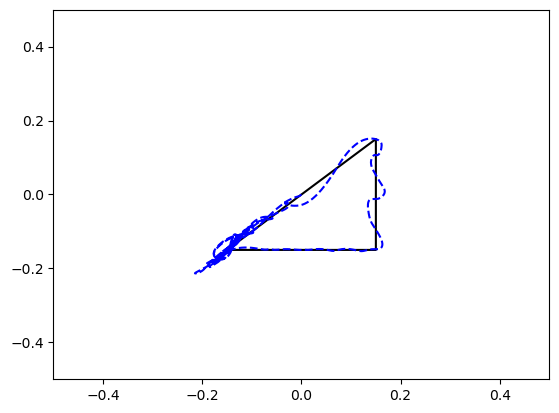

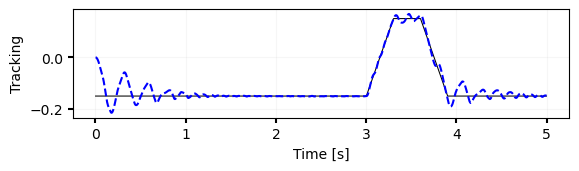

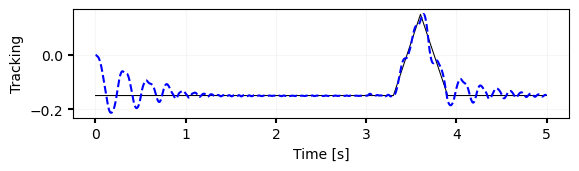

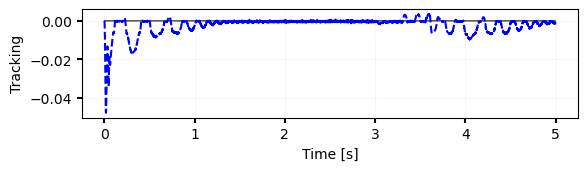

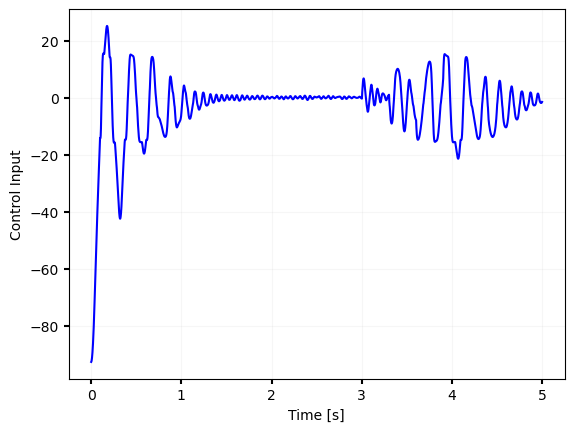

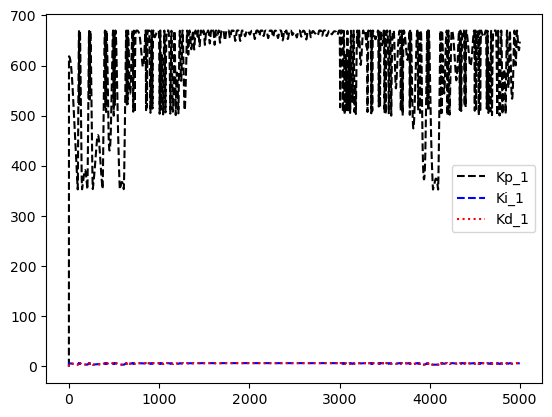

In [115]:
__init__()